In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gr = nx.grid_graph((6,6))

In [15]:
# want to compute the heat kernel
# need the Laplacian
lapl = -1*nx.laplacian_matrix(gr).toarray()
print(lapl)
# eigenvectors and values 
evals, U = np.linalg.eigh(lapl)

[[-2  1  0 ...  0  0  0]
 [ 1 -3  1 ...  0  0  0]
 [ 0  1 -3 ...  0  0  0]
 ...
 [ 0  0  0 ... -3  1  0]
 [ 0  0  0 ...  1 -3  1]
 [ 0  0  0 ...  0  1 -2]]


In [12]:
evals

array([-7.46410162e+00, -6.73205081e+00, -6.73205081e+00, -6.00000000e+00,
       -5.73205081e+00, -5.73205081e+00, -5.00000000e+00, -5.00000000e+00,
       -4.73205081e+00, -4.73205081e+00, -4.00000000e+00, -4.00000000e+00,
       -4.00000000e+00, -4.00000000e+00, -4.00000000e+00, -3.73205081e+00,
       -3.73205081e+00, -3.26794919e+00, -3.26794919e+00, -3.00000000e+00,
       -3.00000000e+00, -3.00000000e+00, -3.00000000e+00, -2.26794919e+00,
       -2.26794919e+00, -2.00000000e+00, -2.00000000e+00, -2.00000000e+00,
       -1.26794919e+00, -1.26794919e+00, -1.00000000e+00, -1.00000000e+00,
       -5.35898385e-01, -2.67949192e-01, -2.67949192e-01, -1.29461849e-15])

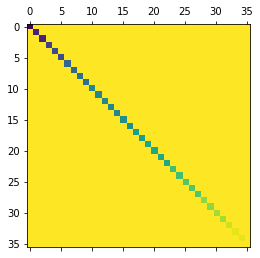

In [14]:
plt.matshow(np.diag(evals))

In [16]:
def hkt(t):
    exp = np.exp( t * evals )
    lamb = np.diag(exp)
    return U.dot( lamb  ).dot(U.T)

In [18]:
initial_heat = np.zeros(36)
initial_heat[12] = 1.0

In [25]:
node_pos = nx.spring_layout(gr)

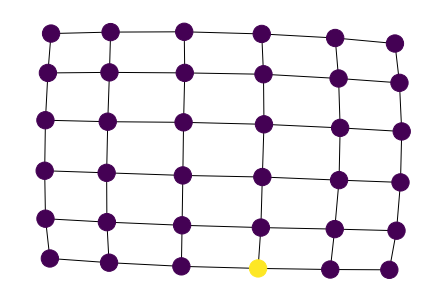

In [26]:
nx.draw(
    gr,
    node_color = initial_heat,
    pos = node_pos
    
)

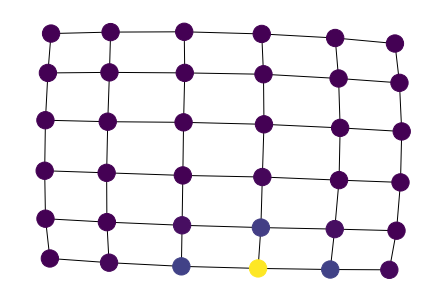

In [27]:
nx.draw(
    gr,
    node_color = hkt(.2).dot(initial_heat),
    pos = node_pos
)

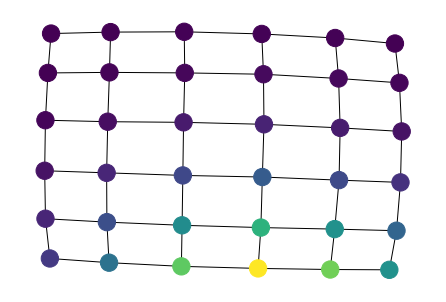

In [28]:
nx.draw(
    gr,
    node_color = hkt(1.2).dot(initial_heat),
    pos = node_pos
)

In [34]:
pagerank = nx.to_numpy_array(gr) + np.eye(36)

In [35]:
pagerank

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [36]:
pagerank /= pagerank.sum(0)

In [37]:
pagerank

array([[0.33333333, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25      , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.25      ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.33333333]])

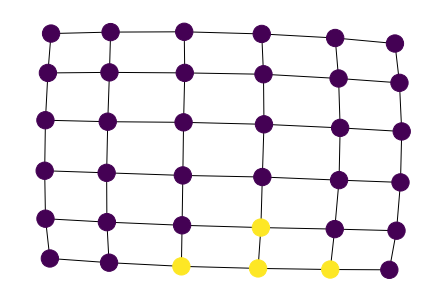

In [38]:
nx.draw(
    gr,
    node_color = pagerank.dot(initial_heat),
    pos = node_pos
)

In [43]:
def heat_kernel_signature(t_values):
    all_results = []
    for t in t_values:
        kernel = hkt(t)
        diagonal = np.diag(kernel)
        rez = np.mean(diagonal)
        all_results.append(rez)
    return np.array(all_results)

In [44]:
heat_kernel_signature([.1, .2, .3, 1.0, 3.0])

array([0.73001966, 0.55248214, 0.43238649, 0.15234607, 0.06250053])

In [39]:
np.array([1,2,3])

array([1, 2, 3])

In [40]:
np.diag(np.array([1,2,3]))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [41]:
np.diag(np.diag(np.array([1,2,3])))

array([1, 2, 3])